In [20]:
# Open the text file for reading
with open("/Users/julianesler/Downloads/dv.txt", "r") as file:
    # Read the entire contents of the file
    file_contents = file.read()

# Now 'file_contents' contains the contents of the text file
#file_contents

In [21]:
import csv

# Specify the input and output file names
input_file = '/Users/julianesler/Downloads/dv.txt'
output_file = 'output.csv'

# Specify the delimiter used in the input file
delimiter = '\t'  # Change this to the actual delimiter used in your file

# Open the input file in text mode and the output file in CSV mode
with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    # Create a CSV writer object
    csv_writer = csv.writer(outfile)

    # Read each line from the input file and write it to the CSV file
    for line in infile:
        # Use the correct delimiter to split the line into fields
        fields = line.strip().split(delimiter)
        
        # Write the fields to the CSV file
        csv_writer.writerow(fields)

# Open and print the contents of the output file
with open(output_file, 'r') as printed_file:
    content = printed_file.read()
    #print(content)

In [22]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'output.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now 'df' is a pandas DataFrame containing your CSV data
#df

In [23]:
df.rename(columns={'agency_cd': 'Agency'}, inplace=True)
df.rename(columns={'site_no': 'SiteID'}, inplace=True)
df.rename(columns={'datetime': 'Date'}, inplace=True)
df.rename(columns={'100139_00060_00003': 'Streamflow'}, inplace=True)
df.rename(columns={'100139_00060_00003_cd': 'Grade'}, inplace=True)
#df

In [24]:
df['Date'].str[:4]

0        1934
1        1934
2        1934
3        1934
4        1934
         ... 
32551    2023
32552    2023
32553    2023
32554    2023
32555    2023
Name: Date, Length: 32556, dtype: object

In [25]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
#df

In [26]:

# Sort DataFrame by date (if not sorted already)
df.sort_values(by='Date', inplace=True)

# Add a new column for the rolling 7-day average
df['7DayMean'] = df['Streamflow'].rolling(window=7).mean()

# Display the result
#df

In [27]:
import math
import numpy as np

#gdf stands for grouped daily flow or perhaps grouped data frame.
gdf = df.groupby('Year')['7DayMean'].agg(list).reset_index()

# Rename the columns if needed
gdf.columns = ['Year', '7DayMean']

ls = gdf.loc[0,'7DayMean']
ls1 = [Q for Q in ls if not math.isnan(Q)]
#print (ls1)
#printed ls1 to check that all the nan values were deleted and that no extra values were deleted.

# This replaces the first list in the gdf dataframe that had nan values with ls1, the cleaned list. 
gdf.at[0,'7DayMean'] = ls1
# Display the result
#gdf

In [28]:
# Find the minimum value for each list in the '7DayMean' column
gdf['AnnualMin'] = gdf['7DayMean'].apply(lambda x: min(x) if x else None)

# Display the result
gdf

,Year,7DayMean,AnnualMin
0,1934,"[600.0, 550.0, 507.14285714285717, 464.2857142...",195.714286
1,1935,"[479.14285714285717, 474.0, 474.0, 493.4285714...",380.285714
2,1936,"[624.0, 624.0, 605.1428571428571, 584.85714285...",312.000000
3,1937,"[683.5714285714286, 628.1428571428571, 584.142...",140.285714
4,1938,"[548.2857142857143, 552.1428571428571, 554.714...",254.714286
...,...,...,...
85,2019,"[501.2857142857143, 513.2857142857143, 521.571...",479.571429
86,2020,"[867.1428571428571, 847.2857142857143, 832.428...",282.428571
87,2021,"[492.14285714285717, 487.85714285714283, 480.8...",333.857143
88,2022,"[554.7142857142857, 533.7142857142857, 523.571...",349.142857


In [29]:
gdf['SortedAnnualMin'] = gdf['AnnualMin'].sort_values().tolist()
print(gdf)

    Year                                           7DayMean   AnnualMin  \
0   1934  [600.0, 550.0, 507.14285714285717, 464.2857142...  195.714286   
1   1935  [479.14285714285717, 474.0, 474.0, 493.4285714...  380.285714   
2   1936  [624.0, 624.0, 605.1428571428571, 584.85714285...  312.000000   
3   1937  [683.5714285714286, 628.1428571428571, 584.142...  140.285714   
4   1938  [548.2857142857143, 552.1428571428571, 554.714...  254.714286   
..   ...                                                ...         ...   
85  2019  [501.2857142857143, 513.2857142857143, 521.571...  479.571429   
86  2020  [867.1428571428571, 847.2857142857143, 832.428...  282.428571   
87  2021  [492.14285714285717, 487.85714285714283, 480.8...  333.857143   
88  2022  [554.7142857142857, 533.7142857142857, 523.571...  349.142857   
89  2023  [587.8571428571429, 612.1428571428571, 624.285...  412.285714   

    SortedAnnualMin  
0         12.714286  
1         12.857143  
2         16.714286  
3         5

In [30]:
low_flow = gdf['SortedAnnualMin'].quantile(0.1)
print("7Q10 Low Flow (CF/S):", low_flow)

7Q10 Low Flow (CF/S): 85.5142857142857


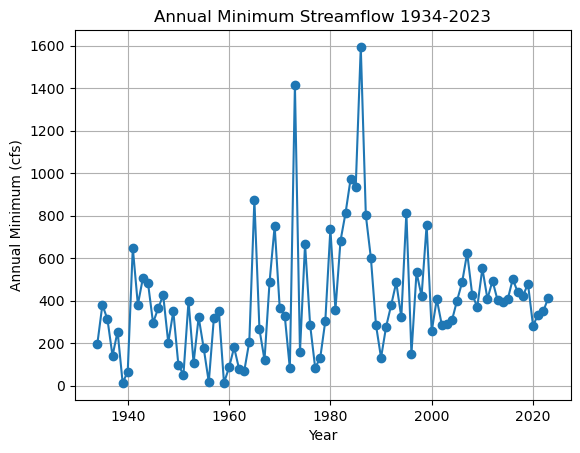

In [31]:
import matplotlib.pyplot as plt

# Plotting
plt.plot(gdf['Year'], gdf['AnnualMin'], marker='o', linestyle='-')
plt.title('Annual Minimum Streamflow 1934-2023')
plt.xlabel('Year')
plt.ylabel('Annual Minimum (cfs)')
plt.grid(True)
plt.show()